<a href="https://colab.research.google.com/github/StellaMassaRebolledo/NeuralNetworks/blob/main/stella_lab2_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# # COMP 263 - DEEP LEARNING
# Assignment #2: Autoencoders and Transfer Learning
# Student: Stella Massa Rebolledo
# ID: 301207800

In [148]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input
import graphviz
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [81]:
'''   ------------  Getting the data -------------     '''
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [82]:
train_images.shape

(60000, 28, 28)

In [83]:
test_images.shape

(10000, 28, 28)

In [84]:
# Dictionaries
unsupervised_stella = {'images': train_images}
supervised_stella = {'images': test_images, 'labels': test_labels}

In [85]:
np.amax (unsupervised_stella['images'])

255

In [86]:
'''  -------------------- Data Pre-processing ---------------'''
# # Normalize pixels for images in supervised and unsupervised dictionaries
unsupervised_stella['images']= np.array([i/255 for i in unsupervised_stella['images']])


In [87]:
np.amax (unsupervised_stella['images'])

1.0

In [88]:
supervised_stella['images'] = np.array([j/255 for j in supervised_stella['images']])

In [89]:
np.amax(supervised_stella['images'])

1.0

In [90]:
# # Apply to_categorical to the supervised dictionary labels
categorical = to_categorical(supervised_stella['labels'], dtype='object')
supervised_stella['labels'] = categorical

In [91]:
supervised_stella['labels'].shape  #changed to 10 cols -- encoding

(10000, 10)

In [92]:
# # Printing shapes
print(f"unsupervised dictionary images' shape: {unsupervised_stella['images'].shape}")
print (f"supervised dictionary images' shape: {supervised_stella['images'].shape}")
print (f"supervised dictionary labels' shape: {supervised_stella['labels'].shape}")


unsupervised dictionary images' shape: (60000, 28, 28)
supervised dictionary images' shape: (10000, 28, 28)
supervised dictionary labels' shape: (10000, 10)


In [93]:
''' --------------- Data Preparation ----------------'''

' --------------- Data Preparation ----------------'

In [94]:
seed = 00

In [95]:
# # Splitting unsupervised array
unsupervised_train_stella, unsupervised_val_stella = train_test_split(unsupervised_stella['images'], test_size=0.05, random_state=seed)

In [96]:
print (unsupervised_train_stella.shape)

(57000, 28, 28)


In [97]:
print(unsupervised_val_stella.shape)

(3000, 28, 28)


In [98]:
# # Discard 7000 samples from supervised dataset (x and y)
X, discard_x, y, discard_y = train_test_split(supervised_stella['images'], supervised_stella['labels'], test_size=0.70, random_state=seed)

In [99]:
print (X.shape)
print (y.shape)

(3000, 28, 28)
(3000, 10)


In [100]:
# # Split remaining supervised dataset (3000) into training (1800), validation (600) and testing (600)
x_full, x_test_stella, y_full, y_test_stella = train_test_split(X, y, test_size=0.20, random_state=seed)

In [101]:
x_train_stella, x_val_stella, y_train_stella, y_val_stella = train_test_split(x_full, y_full, test_size=0.25, random_state=seed)

In [102]:
# # Printing
print (f"Shape of unsupervised training set: {unsupervised_train_stella.shape}")
print (f"Shape of unsupervised validation set: {unsupervised_val_stella.shape}")
print(f"Shape of supervised images training set: {x_train_stella.shape}")
print(f"Shape of supervised images validation set: {x_val_stella.shape}")
print(f"Shape of supervised images testing set: {x_test_stella.shape}")
print(f"Shape of supervised label training set: {y_train_stella.shape}")
print(f"Shape of supervised label validation set: {y_val_stella.shape}")
print(f"Shape of supervised label testing  set: {y_test_stella.shape}")

Shape of unsupervised training set: (57000, 28, 28)
Shape of unsupervised validation set: (3000, 28, 28)
Shape of supervised images training set: (1800, 28, 28)
Shape of supervised images validation set: (600, 28, 28)
Shape of supervised images testing set: (600, 28, 28)
Shape of supervised label training set: (1800, 10)
Shape of supervised label validation set: (600, 10)
Shape of supervised label testing  set: (600, 10)


In [103]:
''' ------------------- Build, train and validate a baseline CNN model -------------'''

' ------------------- Build, train and validate a baseline CNN model -------------'

In [104]:
# # Build CNN using Sequential
im_height, im_width = 28,28
n_clases = 10
input_shape = (im_height, im_width, 1)

In [105]:
cnn_v1_model_stella = Sequential()
cnn_v1_model_stella.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu',  input_shape=input_shape))
cnn_v1_model_stella.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), padding = 'same', activation = 'relu'))
cnn_v1_model_stella.add(Flatten())
cnn_v1_model_stella.add(Dense(100, activation = 'relu'))
cnn_v1_model_stella.add(Dense(n_clases, activation = 'softmax'))

In [106]:
# # Compile the model
cnn_v1_model_stella.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [107]:
cnn_v1_model_stella.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 flatten_4 (Flatten)         (None, 392)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               39300     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


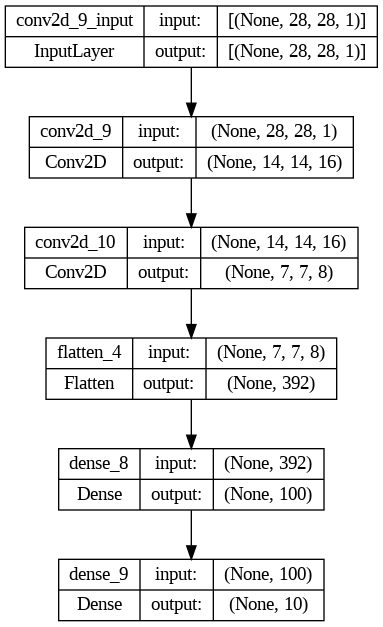

In [108]:
plot_model(cnn_v1_model_stella, to_file='cnn_v1_model_stella.png', show_shapes=True)

In [110]:
# # Use train/val sypervised dataset to train and validate the cnn model

#  Reshape inputs
x_train_stella = x_train_stella.reshape(x_train_stella.shape[0], im_height, im_width, 1)
x_val_stella = x_val_stella.reshape(x_val_stella.shape[0], im_height, im_width, 1)


In [112]:
# converting labels to float
y_train_stella = y_train_stella.astype('float64')
y_val_stella = y_val_stella.astype('float64')

In [113]:
# Fit the model
batch_size = 256
epochs = 10
cnn_v1_history_stella = cnn_v1_model_stella.fit(x_train_stella, y_train_stella, batch_size=batch_size, epochs = epochs, validation_data= (x_val_stella, y_val_stella))

Epoch 1/10
8/8 [==============================] - 4s 418ms/step - loss: 2.2624 - accuracy: 0.2411 - val_loss: 2.1663 - val_accuracy: 0.5300
Epoch 2/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0603 - accuracy: 0.5717 - val_loss: 1.8749 - val_accuracy: 0.5667
Epoch 3/10
8/8 [==============================] - 0s 18ms/step - loss: 1.7148 - accuracy: 0.5683 - val_loss: 1.4659 - val_accuracy: 0.6150
Epoch 4/10
8/8 [==============================] - 0s 18ms/step - loss: 1.3050 - accuracy: 0.6467 - val_loss: 1.0950 - val_accuracy: 0.6783
Epoch 5/10
8/8 [==============================] - 0s 17ms/step - loss: 0.9934 - accuracy: 0.6889 - val_loss: 0.9336 - val_accuracy: 0.6750
Epoch 6/10
8/8 [==============================] - 0s 19ms/step - loss: 0.8436 - accuracy: 0.7011 - val_loss: 0.8080 - val_accuracy: 0.7050
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 0.7621 - accuracy: 0.7267 - val_loss: 0.7946 - val_accuracy: 0.7100
Epoch 8/10
8/8 [==========

In [ ]:
''' -------------- Test and Analyze the baseline model ---------------------'''

In [120]:
cnn_v1_history_stella.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
acc_train = cnn_v1_history_stella.history['accuracy']
print(acc_train)

[0.24111111462116241, 0.5716666579246521, 0.5683333277702332, 0.6466666460037231, 0.6888889074325562, 0.7011111378669739, 0.7266666889190674, 0.742222249507904, 0.7327777743339539, 0.7594444155693054]


In [122]:
acc_val = cnn_v1_history_stella.history['val_accuracy']
print(acc_val)

[0.5299999713897705, 0.5666666626930237, 0.6150000095367432, 0.6783333420753479, 0.675000011920929, 0.7049999833106995, 0.7099999785423279, 0.7083333134651184, 0.7433333396911621, 0.7099999785423279]


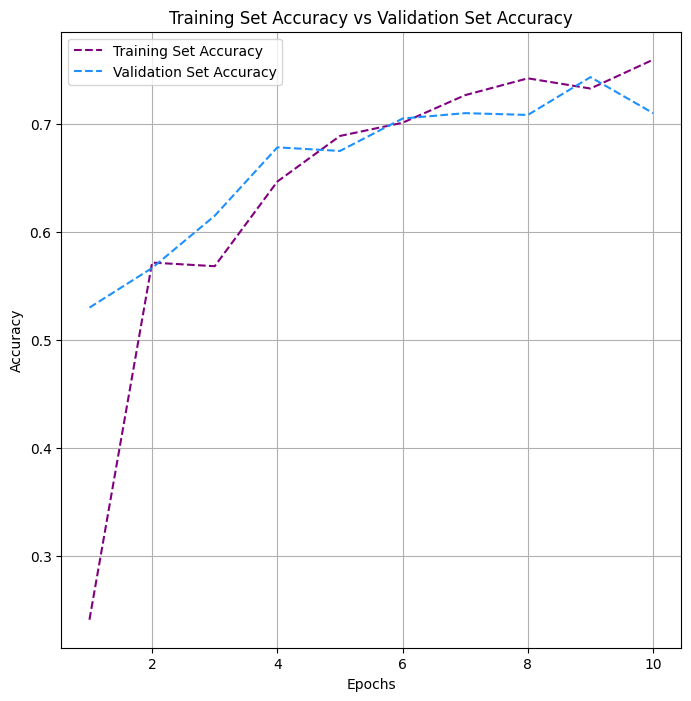

In [130]:
x_range = np.arange (1, 11, 1)
plt.figure (figsize=(8,8))
plt.plot(x_range, acc_train,  linestyle='--', color='purple', label = 'Training Set Accuracy')
plt.plot(x_range, acc_val, linestyle='--', color='dodgerblue', label = 'Validation Set Accuracy')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title ('Training Set Accuracy vs Validation Set Accuracy')
plt.legend()
plt.show()

In [ ]:
# # Evaluate the cnn model

In [124]:
# Reshape x_test
x_test_stella = x_test_stella.reshape(x_test_stella.shape[0], im_height, im_width, 1)

In [125]:
# Converting to float y_test
y_test_stella = y_test_stella.astype('float64')

In [126]:
# Evaluating
evaluation = cnn_v1_model_stella.evaluate(x_test_stella, y_test_stella)

19/19 [==============================] - 0s 26ms/step - loss: 0.7668 - accuracy: 0.6900


In [127]:
print (f"Test accuracy: {evaluation[1]}")

Test accuracy: 0.6899999976158142


In [131]:
# # Predictions
cnn_predictions_stella = cnn_v1_model_stella.predict(x_test_stella)

19/19 [==============================] - 0s 10ms/step


In [135]:
print(y_test_stella[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [136]:
print(np.argmax(y_test_stella[0]))

3


In [138]:
indices = []
for i, j in enumerate(y_test_stella):
  indices.append (np.argmax(y_test_stella[i]))

In [139]:
print (indices[0])

3


In [141]:
y_test_2 = indices

In [142]:
y_pred = []
for i, j in enumerate(cnn_predictions_stella):
  y_pred.append(np.argmax(cnn_predictions_stella[i]))

In [143]:
print(y_pred[0])

3


In [146]:
# # Plot confusion matrix
cm = confusion_matrix(y_test_2, y_pred, labels = np.arange(0,10))

In [147]:
print (cm)

[[41  1  2  8  0  1  8  0  1  0]
 [ 0 44  0  1  0  0  4  0  0  0]
 [ 0  1 45  1  2  0  9  0  2  0]
 [ 1  0  0 54  0  0  1  0  0  0]
 [ 0  4 37  8 14  0  3  0  2  0]
 [ 0  0  0  0  0 55  0  8  0  1]
 [11  0 29  5  1  1  9  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  2]
 [ 0  0  2  4  0  2  4  5 51  0]
 [ 0  0  0  0  0  1  3  9  0 47]]


In [149]:
labels = np.arange(0,10,1)

In [150]:
print(labels)

[0 1 2 3 4 5 6 7 8 9]


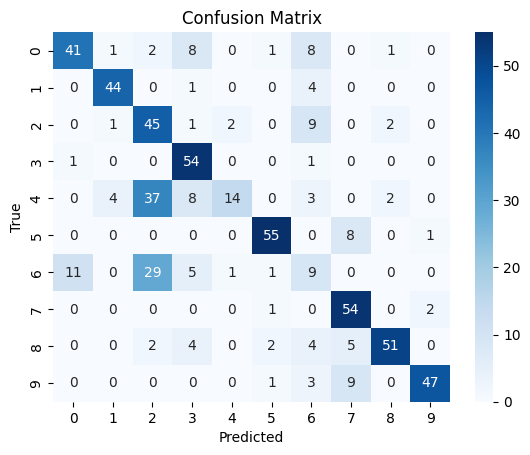

In [159]:
# Seaborn to the rescue
ax = sns.heatmap(cm, annot=True, annot_kws={'size': 10}, xticklabels=labels, yticklabels=labels, cmap='Blues')
ax.set_xlabel ('Predicted', fontsize=10)
ax.set_ylabel('True', fontsize=10)
plt.title ('Confusion Matrix')
plt.axis()
plt.show()

In [163]:
''' ----------- Add random noise to the unsupervised dataset ------------'''
noise_factor = 0.2

In [160]:
pure_train = unsupervised_train_stella
pure_val = unsupervised_val_stella

In [161]:
noise_train = tf.random.normal(pure_train.shape, seed=seed)

In [162]:
noise_val = tf.random.normal(pure_val.shape, seed=seed)

In [164]:
x_train_noisy_stella = pure_train + (noise_train*noise_factor)

In [165]:
x_val_noisy_stella = pure_val +(noise_val*noise_factor)